In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120
import numpy as np
import sys,os
my_PyCore_dir = os.path.dirname('./PyCore_Src/')
sys.path.append(my_PyCore_dir)
import PyCORe_main as pcm
from scipy.constants import c, hbar
%matplotlib widget

# Define the dispersion
Num_of_modes = 2**9
mu = np.arange(-Num_of_modes/2,Num_of_modes/2)
D2 = 4.1e6*2*np.pi 
Dint = (mu**2*D2/2) 

# plot dispersion here
# fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(mu, Dint)
# ax.set_xlabel(r'Mode index, $\mu$')
# ax.set_ylabel(r'D_\mathrm{int}, MHz')

# Define the properties of the resonator
PhysicalParameters = {'n0' : 1.9,
                      'n2' : 2.4e-19,### m^2/W
                      'FSR' : 200e9 ,
                      'w0' : 2*np.pi*192e12,
                      'width' : 1.5e-6,
                      'height' : 0.85e-6,
                      'kappa_0' : 50e6*2*np.pi,
                      'kappa_ex' : 50e6*2*np.pi,
                      'Dint' : Dint
                      }

# Laser and detuning parameters
dNu_ini = -1e9 #Hz
dNu_end = 3e9 #Hz
nn = 2000
dOm = 2*np.pi*np.linspace(dNu_ini,dNu_end,nn)
scan_time = 1e-6 #s
P0 = 0.12 # W
Pump = np.zeros(len(mu),dtype='complex')
Pump[0] = np.sqrt(P0)

# Input parameters to the simulation
simulation_parameters = {'slow_time' : scan_time,
                         'detuning_array' : dOm,
                         'noise_level' : 1e-9,
                         'output' : 'map',
                         'absolute_tolerance' : 1e-10,
                         'relative_tolerance' : 1e-6,
                         'max_internal_steps' : 6000}
single_ring = pcm.Resonator()
single_ring.Init_From_Dict(PhysicalParameters)

# Simulation
map2d = single_ring.Propagate_SplitStep(simulation_parameters, Pump,dt=0.5e-3)


d:\Latex\K_Lab_MC\py\2_in_1\./PyCore_Src\PyCORe_main.py:88: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, mu, self.Dint)


Progress: |██████████████████████████████████████████████████| 100.0% Complete, elapsed time = 26.0 s


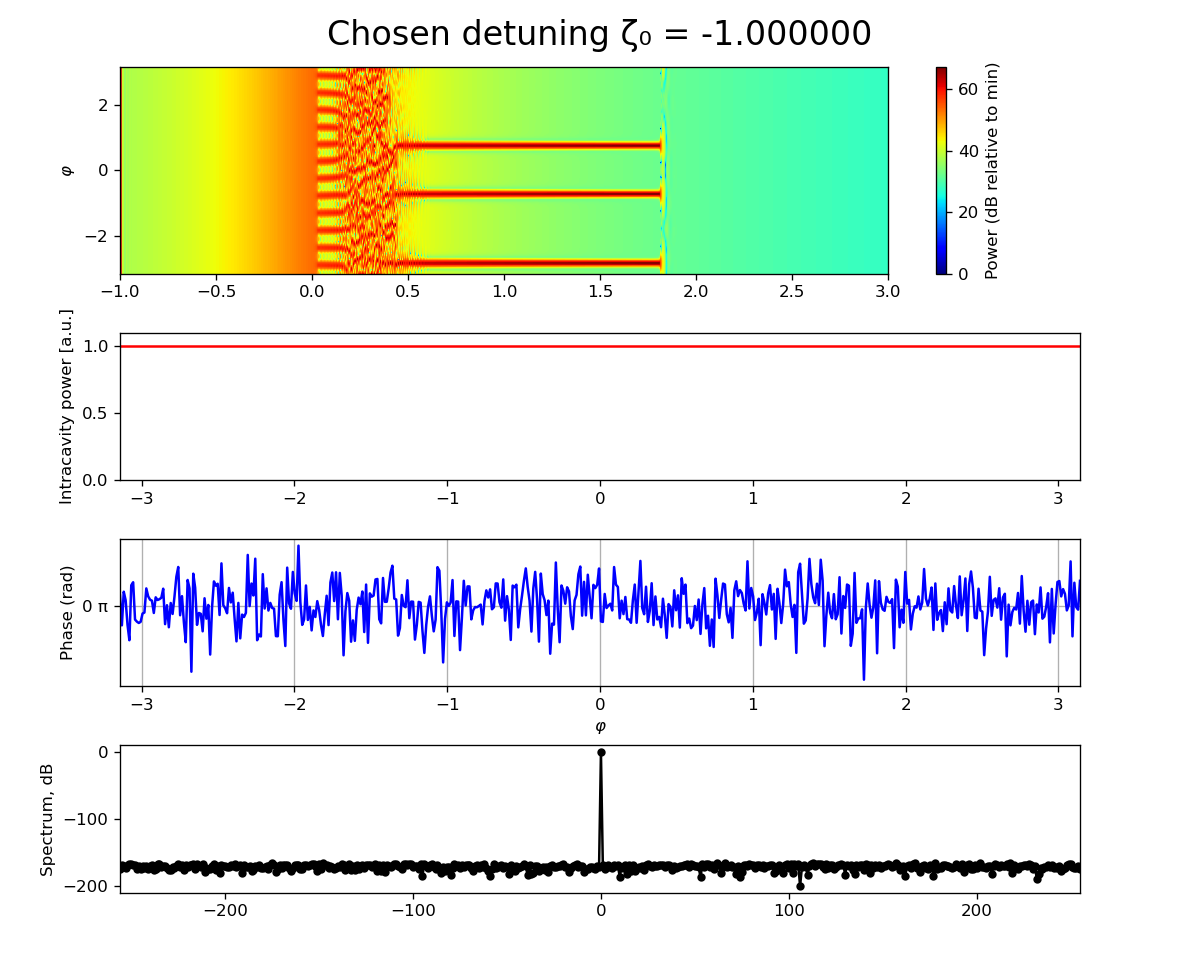

In [2]:
pcm.Plot_Map(np.fft.ifft(map2d,axis=1),dOm/2/np.pi/1e9,colormap='jet')